In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1- Loading Data

In [26]:
filepath="../content/drive/MyDrive/google colab/disaster tweet/data/"
data = pd.read_csv(f"{filepath}train.csv")
pd.set_option('display.max_colwidth', None)
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


# 2- Dataset information


Training set information:
---------


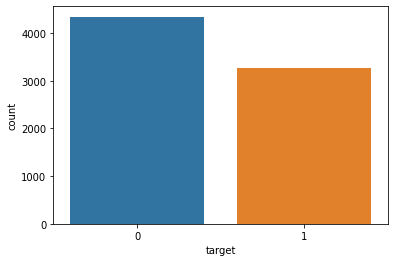

Input data has 7613 rows and, 5 column

Proportion of samples with label 1 (ie A real disaster tweet): 42.97 %
Proportion of samples with label 0 (ie Not a real disaster tweet): 57.03 %

Number of Missing Tweets = 0
Number of Missing Targets = 0


In [27]:
print("\nTraining set information:")
print("---------")
sns.countplot(x="target", data=data)
plt.show()

print(f'Input data has {len(data)} rows and, {len(data.columns)} column\n')

print("Proportion of samples with label 1 (ie A real disaster tweet):", np.round(data["target"].sum()/len(data)*100,2), "%")
print("Proportion of samples with label 0 (ie Not a real disaster tweet):", np.round((1-data["target"].sum()/len(data))*100,2),"%\n")


print(f'Number of Missing Tweets = {data["text"].isnull().sum()}')
print(f'Number of Missing Targets = {data["target"].isnull().sum()}')

# balancing  Data

In [28]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = data[(data['target']==0)] 
df_minority = data[(data['target']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 4340, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

-->Show value counts for each class 


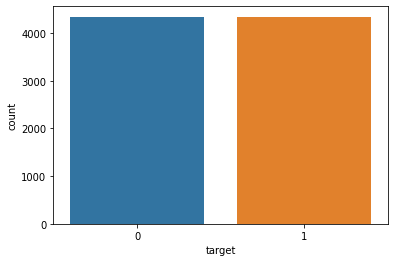

Input data has 8682 rows and, 5 column

Proportion of samples with label 1 (ie A real disaster tweet): 49.99 %
Proportion of samples with label 0 (ie Not a real disaster tweet): 50.01 %

Number of Missing Tweets = 0
Number of Missing Targets = 0


In [29]:
print("-->Show value counts for each class ")
sns.countplot(x="target", data=df_upsampled)#Show the counts of observations in each class bin using bars.
plt.show()#if i remove this line the histogram  will appeare in final 


print(f'Input data has {len(df_upsampled)} rows and, {len(df_upsampled.columns)} column\n')

print("Proportion of samples with label 1 (ie A real disaster tweet):", np.round(df_upsampled["target"].sum()/len(df_upsampled)*100,2), "%")
print("Proportion of samples with label 0 (ie Not a real disaster tweet):", np.round((1-df_upsampled["target"].sum()/len(df_upsampled))*100,2),"%\n")


print(f'Number of Missing Tweets = {df_upsampled["text"].isnull().sum()}')
print(f'Number of Missing Targets = {df_upsampled["target"].isnull().sum()}')

# 3- Dataset Cleaning
As the text in these samples are tweets, there may be twitter handles or hashtags that are nonsense, but some handles for example could be for an emergency service account which can help us in our prediction. There also may be links in a tweet, which will not be as helpful and we can remove. 

The function will 
* remove the @ and # of handles and hashtags
* set text to lowercase
* remove html characters
* remove Emails ex. sebaiy@gmail.com
* convert apostrophe contractions to their full counterparts ex. i'm ==> i am
* remove hyperlinks
* remove stopwords
* remove punctuation 
* remove weird quirks from tweets such as "û_" and "vÌ_deo"

In [30]:
import html
import re
import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from wordcloud import ImageColorGenerator
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [31]:
stop_words = set(stopwords.words('english'))

wnl = WordNetLemmatizer()  
set(string.punctuation)
stop_words.add('u')

Apos_dict={"'s":" is","won't":"will not", "can't":"cannot","n't":" not","'m":" am","'ll":" will",
           "'d":" would","'ve":" have","'re":" are"}

def clean_text(text):
    
    text=text.lower()
    
    text=html.unescape(text) # remove html tag words
    
    for key,value in Apos_dict.items(): # remove contractions
        if key in text:
            text = text.replace(key,value)

    text=re.sub(r"\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{1,4}\b", "", text) #emails like (sebaiy.mohamed@gmail.com)
    
    text=re.sub(r"[À-ÿ]+", "", text) #remove sympols like ([À, Ç, Ë,.., ÿ)
    
    text=re.sub(r'https?:\/\/.\S+', "",text)    # remove links
    
    text=re.sub(r'\S*û_*\S*|@\w*|#\w*', "",text) # remove u_, handles and just the hashtag froms hashtags
    
    text=re.sub(r'[0-9]', "", text) #remove numbers(digits)

    text=re.sub(r'[^\w\s]', "",text)# remove any character not in the set [^] ie punctuation, can add # | @ here

    no_stopwords = [i for i in  WhitespaceTokenizer().tokenize(text) if i not in stop_words]
    
    n_lemma = [wnl.lemmatize(i, pos= 'n') for i in  no_stopwords] # nouns Lemmatizations
    v_lemma = [wnl.lemmatize(i, pos= 'v') for i in  n_lemma] # verb Lemmatizations
    a_lemma = [wnl.lemmatize(i, pos= 'a') for i in  v_lemma] # adjectives Lemmatizations
    r_lemma = [wnl.lemmatize(i, pos= 'r') for i in  a_lemma] # adverbs Lemmatizations
    s_lemma = [wnl.lemmatize(i, pos= 's') for i in  r_lemma] # satellite adjectives Lemmatization
    
    # remove punctuation
    no_punct = []
    
    for word in s_lemma:
        s = ""
        for ch in word:
            if ch not in set(string.punctuation):
                s = f'{s}{ch}'
        no_punct.append(s)
        
    text = " ".join(no_punct)       
    return text

#print(f"An example\nThe uncleaned tweet: {data['text'].loc[71]}")
#print(f"The cleaned tweet: {clean_text(data['text'].loc[71])}")

In [32]:
cleaned_data = pd.DataFrame()

cleaned_data["text"] = df_upsampled["text"].apply(clean_text)

cleaned_data["target"] = df_upsampled["target"]
cleaned_data.head()

,text,target
7421,police officer wound suspect dead exchange shoot ushed,1
2245,hyderabad deluge heavy rainfall,1
3264,car engulf flame back traffic parleyªs summit,1
2873,california drought gonna issue want president attitude work,1
2828,news update family displace fire damage house near th osborn fire extinguish i,1


# Splitting Data

In [33]:
from sklearn import model_selection

In [34]:
x_train_data, x_test_data, y_train, y_test = model_selection.train_test_split(cleaned_data["text"], cleaned_data["target"], test_size=0.2, random_state=1)
print(x_train_data)

4848                                               mass murderer che guevara greet woman north korea
3923                w cree lead work light bar alloy spot flood combo dive offroad wd boat full read
353                                     build kingdom lead army victory start g friend code lzktjnox
3836    shoot event theater give free coffee first responder police firefighter antiochhickoryhollow
4860    julian knight dismiss mass murderer attempt increase prisoner pay challenge quantum increase
                                                    ...                                             
6122                                              keep sink everyday seem fast year titanic disaster
5990          come downstairs try look normal possible front mom rhiannon scream hungover huh uhmmmm
608                                  fedex long transport bioterror germ wake anthrax lab mishap via
1317                                                     play boat club memory london burn 

# Vectorization

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(stop_words='english',
                              analyzer="word",
                              ngram_range=(1, 1),
                              max_features=None)

tf_idf = vec.fit_transform(cleaned_data["text"])

x_train = vec.transform(x_train_data)
x_test = vec.transform(x_test_data)

x_train = x_train.toarray()
x_test = x_test.toarray()
pd.DataFrame(tf_idf.toarray())

,0,1,2,3,4,5,6,7,8,9,...,10088,10089,10090,10091,10092,10093,10094,10095,10096,10097
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
print(x_train.shape,'\n', x_test.shape)


(6945, 10098) 
 (1737, 10098)


In [37]:
print(f"Tweet: {cleaned_data['text'][5]}")
print(f"Vectorised tweet:\n{x_train[5]}")
x = pd.DataFrame(x_train, columns=vec.get_feature_names_out())
x

Tweet: update california hwy close direction due lake county fire
Vectorised tweet:
[0. 0. 0. ... 0. 0. 0.]


,aa,aaaa,aaaaaand,aal,aan,aannnnd,aar,aashiqui,ab,aba,...,zonesthank,zonewolf,zoom,zotar,zouma,zrnf,zumiez,zurich,zzzz,ªs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Accuracy Display

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import validation_curve

def conf_metric(m, y_test, y_pred):
    
    cm = confusion_matrix(y_test, y_pred, labels=m.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=m.classes_)
    disp.plot()
    plt.show()
    # Model Accuracy: how often is the classifier correct?
    print("Accuracy:", f'{round(accuracy_score(y_test, y_pred) * 100, 2)}%')
    

# Support Vector Machine 

## search for best pramter for SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
kernel = ['linear', 'rbf']
para = dict(kernel = kernel, C=[2])
svm_grid = GridSearchCV(svm.SVC(), param_grid= para, verbose=3)
svm_grid_result = svm_grid.fit(x_train, y_train)

print(f'best score: {svm_grid_result.best_score_}, parameter: {svm_grid_result.best_params_}')
mean = svm_grid_result.cv_results_['mean_test_score']
stds = svm_grid_result.cv_results_['std_test_score']
params = svm_grid_result.cv_results_['params']

for m, s, p in zip(mean, stds, params):
  print(f'mean = {m}, stdv = {s}, parameter = {p}')

## the best kernel for svm
### the best kernel is: 


* applay kernel

In [ ]:
%%time

from sklearn import svm

#Create a svm Classifier
svm_classifier = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_classifier.fit(x_train, y_train)
y_pred = svm_classifier.predict(x_test)
conf_metric(svm_classifier, y_test, y_pred)

"#Import svm model\nfrom sklearn import svm\n\n#Create a svm Classifier\nclf = svm.SVC(kernel='linear') # Linear Kernel\n\n#Train the model using the training sets\nclf.fit(x_train, y_train)\n\ny_pred = clf.predict(x_test)\n\n\nconf_metric(clf, y_test, y_pred)"

# Logisitic Regression

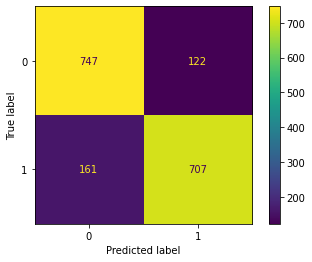

Accuracy: 83.71%
CPU times: user 7.66 s, sys: 349 ms, total: 8.01 s
Wall time: 4.18 s


In [23]:
%%time
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()          
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
conf_metric(logreg, y_test, y_pred)

# Random Forest
## serach for the best compination of parameters

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
n_estimators = list(range(40, 130, 30))
criterion = ["gini", "entropy"]
max_features = ["sqrt", "log2"]
rf_para = dict(n_estimators=n_estimators, criterion=criterion, max_features=max_features)

rf_grid = GridSearchCV(RandomForestClassifier(), param_grid= rf_para, verbose=3)
rf_grid_result = rf_grid.fit(x_train, y_train)
print(f'best score: {rf_grid_result.best_score_}, parameter: {rf_grid_result.best_params_}')
mean = rf_grid_result.cv_results_['mean_test_score']
stds = rf_grid_result.cv_results_['std_test_score']
params = rf_grid_result.cv_results_['params']

for m, s, p in zip(mean, stds, params):
  print(f'mean = {m}, stdv = {s}, parameter = {p}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=gini, max_features=sqrt, n_estimators=40;, score=0.845 total time=  18.5s
[CV 2/5] END criterion=gini, max_features=sqrt, n_estimators=40;, score=0.852 total time=  18.0s
[CV 3/5] END criterion=gini, max_features=sqrt, n_estimators=40;, score=0.826 total time=  18.0s
[CV 4/5] END criterion=gini, max_features=sqrt, n_estimators=40;, score=0.837 total time=  17.8s
[CV 5/5] END criterion=gini, max_features=sqrt, n_estimators=40;, score=0.857 total time=  18.1s
[CV 1/5] END criterion=gini, max_features=sqrt, n_estimators=70;, score=0.852 total time=  31.9s
[CV 2/5] END criterion=gini, max_features=sqrt, n_estimators=70;, score=0.842 total time=  32.6s
[CV 3/5] END criterion=gini, max_features=sqrt, n_estimators=70;, score=0.821 total time=  31.4s
[CV 4/5] END criterion=gini, max_features=sqrt, n_estimators=70;, score=0.841 total time=  30.2s
[CV 5/5] END criterion=gini, max_features=sqrt, n_estimators=70;, 

AttributeError: ignored

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

RF= RandomForestClassifier(n_estimators=100, criterion='gini', max_features= 'log2')          
RF.fit(x_train, y_train)

y_pred = RF.predict(x_test)

conf_metric(RF, y_test, y_pred)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


"from sklearn.ensemble import RandomForestClassifier\n\nRF= RandomForestClassifier(n_estimators=45, criterion='gini')          \nRF.fit(x_train, y_train)\n\ny_pred = RF.predict(x_test)\n\nconf_metric(RF, y_test, y_pred)"

# KNN
## find the best parameter for knn


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
n_neighbors = tuple(range(1, 100, 5))
weights = ['uniform', 'distance']
algorithm = ['ball_tree', 'kd_tree', 'brute']
metric = ['cosine']
knn_para = dict(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, metric=metric)
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid= knn_para, verbose=3)
knn_grid_result = knn_grid.fit(x_train, y_train)

print(f'best score: {knn_grid_result.best_score_}, parameter: {knn_grid_result.best_params_}')
mean = knn_grid_result.cv_results_['mean_test_score']
stds = knn_grid_result.cv_results_['std_test_score']
params = knn_grid_result.cv_results_['params']

for m, s, p in zip(mean, stds, params):
  print(f'mean = {m}, stdv = {s}, parameter = {p}')

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END algorithm=ball_tree, metric=cosine, n_neighbors=1, weights=uniform;, score=nan total time=   0.2s
[CV 2/5] END algorithm=ball_tree, metric=cosine, n_neighbors=1, weights=uniform;, score=nan total time=   0.2s
[CV 3/5] END algorithm=ball_tree, metric=cosine, n_neighbors=1, weights=uniform;, score=nan total time=   0.2s
[CV 4/5] END algorithm=ball_tree, metric=cosine, n_neighbors=1, weights=uniform;, score=nan total time=   0.2s
[CV 5/5] END algorithm=ball_tree, metric=cosine, n_neighbors=1, weights=uniform;, score=nan total time=   0.2s
[CV 1/5] END algorithm=ball_tree, metric=cosine, n_neighbors=1, weights=distance;, score=nan total time=   0.2s
[CV 2/5] END algorithm=ball_tree, metric=cosine, n_neighbors=1, weights=distance;, score=nan total time=   0.2s
[CV 3/5] END algorithm=ball_tree, metric=cosine, n_neighbors=1, weights=distance;, score=nan total time=   0.2s
[CV 4/5] END algorithm=ball_tree, metric=cosin

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
400 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/n

In [ ]:
%%time
#import KNN model 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =35, metric = 'cosine', n_jobs=-1)
#train to model
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
conf_metric(knn, y_test, y_pred)

# Combination

In [ ]:
all_classifiers = list()
all_classifiers.append(svm_classifier)
all_classifiers.append(logreg)
all_classifiers.append(RF)
all_classifiers.append(knn)

In [ ]:
def vote_predict(x_test, x_test_rar, models):
    def tras(t):
        if t == 0:
            return "Not Disaster"
        return "Disaster"
    
    
    
    all_predictions = []      #[(c, [prdi]),(b, [prdi]),(x, [prdi])]
    
    for i in models:
        all_predictions.append((i, i.predict(x_test)))
        
    y_pre = []
    n = len(models)
    for i in range(len(x_test)): 
        count = 0
        for p in range(n):
            count += all_predictions[p][1][i]
            
        if count > int(n / 2):
            y_pre.append(1)
        elif count <= int(n / 2):
            y_pre.append(0)
        else:
            y_pre.append(np.random.randint(2))
           
    print("Accuracy:", f'{round(accuracy_score(y_test, y_pre) * 100, 2)}%')

    t = pd.DataFrame({
            "tweet" : x_test_rar,
            "True" : y_test,
            "predict" : y_pre 
            })
    t['True'] = t['True'].apply(tras)
    t['predict'] = t['predict'].apply(tras)  
    return t

In [ ]:
a = vote_predict(x_test, x_test_data, all_classifiers)

In [ ]:
a.head()